# Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

* кошки (животные)
* UNIX-утилита cat для вывода содержимого файлов
* версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:
    
    1. Скачайте файл с предложениями (sentences.txt).
    2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
    3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
    4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
    5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
    6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
    7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
    8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

In [29]:
import re
dict_words = {}
lines_list = []
with open('sentences.txt') as f:
    for line in f:
        line = line.strip().lower()
        line = re.split('[^a-z]', line)
        line = [x for x in line if x]
        lines_list.append(line)
        for word in line:
            if word in dict_words:
                dict_words[word] += 1
            else:
                dict_words[word] = 1
            #dict_words.setdefault(word, 0)
print (dict_words)

{'in': 11, 'comparison': 1, 'to': 14, 'dogs': 1, 'cats': 4, 'have': 2, 'not': 1, 'undergone': 1, 'major': 2, 'changes': 2, 'during': 1, 'the': 20, 'domestication': 1, 'process': 2, 'as': 6, 'cat': 10, 'simply': 2, 'catenates': 1, 'streams': 1, 'of': 19, 'bytes': 2, 'it': 4, 'can': 3, 'be': 3, 'also': 2, 'used': 1, 'concatenate': 2, 'binary': 1, 'files': 1, 'where': 2, 'will': 2, 'just': 3, 'sequence': 2, 'a': 13, 'common': 1, 'interactive': 1, 'use': 2, 'for': 4, 'single': 1, 'file': 5, 'is': 7, 'output': 3, 'content': 2, 'standard': 1, 'hear': 1, 'sounds': 1, 'too': 2, 'faint': 1, 'or': 3, 'high': 1, 'frequency': 1, 'human': 2, 'ears': 1, 'such': 2, 'those': 1, 'made': 1, 'by': 3, 'mice': 1, 'and': 14, 'other': 2, 'small': 2, 'animals': 1, 'one': 4, 'people': 1, 'deliberately': 1, 'tamed': 1, 'artificial': 1, 'selection': 1, 'they': 1, 'were': 2, 'useful': 1, 'predators': 1, 'vermin': 1, 'domesticated': 1, 'its': 2, 'closest': 1, 'wild': 1, 'ancestor': 1, 'are': 2, 'both': 1, 'diploid

In [10]:
len(dict_words)

254

In [32]:
lines_list

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

In [52]:
import numpy as np
stat_matrix = []
for line in lines_list:
    for word in dict_words:
        stat_matrix.append(line.count(word))
matrix = np.array(stat_matrix).reshape(22,254)

In [53]:
matrix.shape

(22, 254)

In [55]:
len(matrix[0])

254

In [75]:
matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 1]])

In [80]:
from scipy.spatial import distance
cos_dict = [distance.cosine(matrix[0], matrix[X]) for X in range(0, 22)]
cos_dict

[0.0,
 0.9527544408738466,
 0.8644738145642124,
 0.8951715163278082,
 0.7770887149698589,
 0.9402385695332803,
 0.7327387580875756,
 0.9258750683338899,
 0.8842724875284311,
 0.9055088817476932,
 0.8328165362273942,
 0.8804771390665607,
 0.8396432548525454,
 0.8703592552895671,
 0.8740118423302576,
 0.9442721787424647,
 0.8406361854220809,
 0.956644501523794,
 0.9442721787424647,
 0.8885443574849294,
 0.8427572744917122,
 0.8250364469440588]

In [81]:
import pandas as pd

In [82]:
cos_table = pd.DataFrame(cos_dict)

In [83]:
cos_table.sort_values(0)

,0
0,0.000000
6,0.732739
4,0.777089
21,0.825036
10,0.832817
12,0.839643
16,0.840636
20,0.842757
2,0.864474
13,0.870359


# Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

    1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [85]:
import numpy as np
def f(X):
    res = []
    for x in X:
        res.append(np.sin(x/5.) * np.exp(x/10.) + 5 * np.exp(-x/2.))
    return res
# вроде и без res при передаче массива вернет массив значений

In [97]:
X = [1, 15]
Y = f(X)

In [91]:
def coef_matr(X, deg):
    """
    This function create coefficient matrix
    """
    A = []
    for x in X:
        for d in range(deg+1):
            A.append(x ** d)
    A = np.array(A).reshape((len(X), deg+1))
    return A

In [96]:
K = coef_matr(X, 1)
K

array([[ 1,  1],
       [ 1, 15]])

In [99]:
# Найдем w0,w1,..- решим систему уравнение
W = np.linalg.solve(K, Y)
W

array([ 3.43914511, -0.18692825])

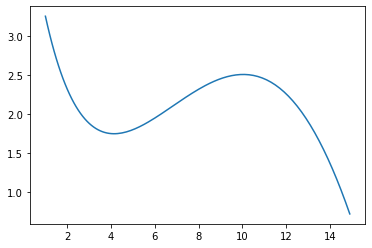

In [101]:
# Нарисуем графики
%matplotlib inline
from matplotlib import pylab as plt
x = np.arange(1, 15, 0.1)
y = f(x)
plt.plot(x, y)
plt.show()

In [109]:
# вычислим значения многочленов с полученными коэф-тами по отрезку [1,15]
P = [W.dot(x) for x in K]
P

[3.2522168652714187, 0.6352214195786656]

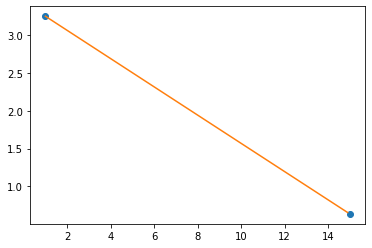

In [111]:
# нарисуем полученный многочлен
from scipy import interpolate
func_inter = interpolate.interp1d(X, P, kind='linear')
xnew = np.arange(1, 15, 0.1)
ynew = func_inter(xnew)

plt.plot(X, P, 'o', xnew, ynew, '-')
plt.show()

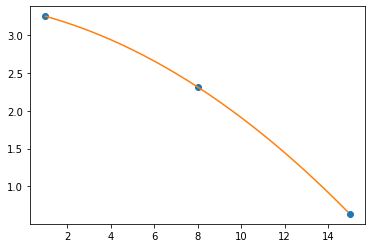

In [112]:
# для многочлена второй степени
X = [1, 8, 15]
Y = f(X)
K = coef_matr(X, 2)
W = np.linalg.solve(K, Y)

P = [W.dot(x) for x in K]

func_inter = interpolate.interp1d(X, P, kind='quadratic')
xnew = np.arange(1, 15, 0.1)
ynew = func_inter(xnew)

plt.plot(X, P, 'o', xnew, ynew, '-')
plt.show()

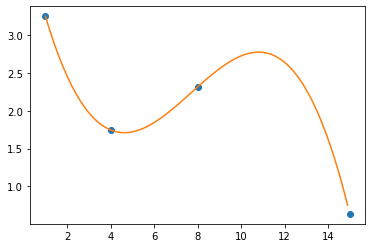

In [113]:
# для многочлена третьей степени
X = [1,4, 8, 15]
Y = f(X)
K = coef_matr(X, 3)
W = np.linalg.solve(K, Y)

P = [W.dot(x) for x in K]

func_inter = interpolate.interp1d(X, P, kind='cubic')
xnew = np.arange(1, 15, 0.1)
ynew = func_inter(xnew)

plt.plot(X, P, 'o', xnew, ynew, '-')
plt.show()

In [114]:
W

array([ 4.41187544, -1.3603505 ,  0.20974815, -0.00905622])